# 9. Mini-batch and Backward Search by Numpy

# EXERCISE 1:
# BACKWARD SEARCH FOR VARIABLE SELECTION

### 0. IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import random
import math
import numpy as np

### 1. READING THE DATA

In [2]:
bank_set = pd.read_csv('bank.csv', sep=';')

In [3]:
bank_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [12]:
bank_set['job'].replace({'unemployed':1},inplace=True)

The bank data has 4521 samples and 17 values.

### 2. CONVERTING NON-NUMERIC VALUES 

In this part, we will convert any non-numeric values into the numeric values. For doing this, first, I would find which values are non numeric and I will convert by manually.

In [13]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


According to the info, job ,marital, education,default,housing,loan,contact,month,poutcome and y vlaues are object. 

#### 2.1 Converting the 'job' Column

In [14]:
set(list(bank_set['job']))

{1,
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unknown'}

In [15]:
bank_set['job'].replace({'admin.':0, 'blue-collar':1  , 'entrepreneur':2, 
                        'housemaid':3, 'management':4, 'retired':5 ,'self-employed':6
                       ,'services':7, 'services':8 , 'student':9 , 'technician':10
                       , 'unemployed':11, 'unknown':12}, inplace = True)

#### 2.2 Converting the 'marital' Columns

In [16]:
set(list(bank_set['marital']))

{'divorced', 'married', 'single'}

In [17]:
bank_set['marital'].replace({'divorced':0 , 'married':1,'single':2}, inplace=True)

#### 2.3 Converting the 'education' Columns

In [18]:
set(list(bank_set['education']))

{'primary', 'secondary', 'tertiary', 'unknown'}

In [19]:
bank_set['education'].replace({'primary':0, 'secondary':1 , 'tertiary':2 , 'unknown':3}, inplace=True)

#### 2.4 Converting the 'default' Column

In [20]:
set(list(bank_set['default']))

{'no', 'yes'}

In [21]:
bank_set['default'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.5 Converting the 'Housing'   Column 

In [22]:
set(list(bank_set['housing']))

{'no', 'yes'}

In [23]:
bank_set['housing'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.6 Converting the 'loan' Column

In [24]:
set(list(bank_set['loan']))

{'no', 'yes'}

In [25]:
bank_set['loan'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.7 Converting the 'Contact' Column

In [26]:
set(list(bank_set['contact']))

{'cellular', 'telephone', 'unknown'}

In [27]:
bank_set['contact'].replace({'cellular':0, 'telephone':1 , 'unknown':2}, inplace=True)

#### 2.8 Converting the 'month' Column

In [28]:
set(list(bank_set['month']))

{'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep'}

In [29]:
bank_set['month'].replace({'jan':0 , 'feb':1 , 'mar':2 , 'apr':3 , 'may':4,
                           'jun':5 , 'jul':6 , 'aug':7 , 'sep':8 , 'oct':9,
                           'nov':10, 'dec':11}, inplace = True)

#### 2.9 Converting 'poutcom' Column

In [30]:
set(list(bank_set['poutcome']))

{'failure', 'other', 'success', 'unknown'}

In [31]:
bank_set['poutcome'].replace({'failure':0 , 'other':1 , 'success':2 , 'unknown':3}, inplace=True)

#### 2.10 Converting 'y' Column

In [32]:
set(list(bank_set['y']))

{'no', 'yes'}

In [33]:
bank_set['y'].replace({'no':0 , 'yes':1}, inplace = True)

#### 2.11 Final Data Set

In [34]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [35]:
bank_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,1,0,0,1787,0,0,0,19,9,79,1,-1,0,3,0
1,33,8,1,1,0,4789,1,1,0,11,4,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,3,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,5,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,4,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,8,1,1,0,-333,1,0,0,30,6,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,4,153,1,-1,0,3,0
4518,57,10,1,1,0,295,0,0,0,19,7,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,1,129,4,211,3,1,0


### 3. EXISTING OF MISSING VALUES

Now, we will use .info() function the know whether data set has NaN values or not.

In [36]:
bank_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


According to the info, there is no any NaN values in the data. For this reason, no need to drop any columns.

### 4. NORMALIZING THE DATA

####  4. 1 Mean and Standard Deviation of The Data

In [37]:
mu = np.array(bank_set).mean()

In [38]:
sigma = np.std(np.array(bank_set))

In [39]:
print('Mean of The Data =', mu)
print('Standart Deviation of The Data =', sigma)

Mean of The Data = 106.05065251050652
Standart Deviation of The Data = 805.8497617924002


####  4.2 Normalize The Data

In [40]:
dimension_one = int(bank_set.shape[0])
dimension_two = int(bank_set.shape[1])
bank_set_matrix = np.array(bank_set, dtype='f')
for i in range(0,dimension_one):
    for j in range(0,dimension_two):
        bank_set_matrix[i][j]=(bank_set_matrix[i][j]-mu)/sigma
        

In [41]:
a = (np.array(bank_set)[0][0]-mu)/sigma

In [42]:
bank_set_normalized= pd.DataFrame(bank_set_matrix)

### 5. CREATING TRAIN and TEST SET

#### 5.1 Defining a Function to Create Train and Test Set

In [35]:
def train_test_set(data,train_ratio):
    train_set =[]
    test_set=[]
    all_number_of_samples=int(data.shape[0])
    train_number_of_samples = math.floor(all_number_of_samples*train_ratio)
    places_of_train_samples =random.sample(range(0,all_number_of_samples),train_number_of_samples)
    for i in range(0,all_number_of_samples):
        if i in places_of_train_samples:
            train_set.append(data.iloc[i])
        else:
            test_set.append(data.iloc[i])
    return train_set,test_set
        
    

#### 5.2 Train and Test Sets

In [36]:
train_set_bank , test_set_bank = train_test_set(bank_set_normalized,0.8)

In [37]:
pd.DataFrame(train_set_bank)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.094373,-0.130360,-0.130360,-0.131601,-0.131601,2.085934,-0.131601,-0.131601,-0.131601,-0.108023,-0.120433,-0.033568,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
1,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,5.811194,-0.130360,-0.130360,-0.131601,-0.117951,-0.126637,0.141403,-0.130360,0.289073,-0.126637,-0.131601,-0.131601
2,-0.088169,-0.126637,-0.129119,-0.129119,-0.131601,1.543649,-0.130360,-0.131601,-0.131601,-0.111746,-0.127878,0.097970,-0.130360,0.277905,-0.130360,-0.131601,-0.131601
3,-0.094373,-0.126637,-0.130360,-0.129119,-0.131601,1.700006,-0.130360,-0.130360,-0.129119,-0.127878,-0.125396,0.115343,-0.126637,-0.132842,-0.131601,-0.127878,-0.131601
4,-0.058386,-0.130360,-0.130360,-0.130360,-0.131601,-0.131601,-0.130360,-0.131601,-0.129119,-0.125396,-0.126637,0.148848,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.091891,-0.121674,-0.129119,-0.130360,-0.131601,0.455357,-0.130360,-0.131601,-0.131601,-0.122915,-0.124155,0.642737,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
4516,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,-0.544829,-0.130360,-0.131601,-0.131601,-0.094373,-0.124155,0.276664,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
4518,-0.060868,-0.119192,-0.130360,-0.130360,-0.131601,0.234472,-0.131601,-0.131601,-0.131601,-0.108023,-0.122915,0.055779,-0.117951,-0.132842,-0.131601,-0.127878,-0.131601
4519,-0.096855,-0.130360,-0.130360,-0.130360,-0.131601,1.279332,-0.131601,-0.131601,-0.131601,-0.124155,-0.130360,0.028478,-0.126637,0.130234,-0.127878,-0.130360,-0.131601


In [38]:
pd.DataFrame(test_set_bank)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6,-0.086928,-0.124155,-0.130360,-0.129119,-0.131601,0.249363,-0.130360,-0.131601,-0.131601,-0.114228,-0.126637,0.291555,-0.130360,0.277905,-0.129119,-0.130360,-0.131601
9,-0.078241,-0.121674,-0.130360,-0.131601,-0.131601,-0.240803,-0.130360,-0.130360,-0.131601,-0.110505,-0.127878,0.256809,-0.130360,0.050815,-0.129119,-0.131601,-0.131601
27,-0.048459,-0.125396,-0.130360,-0.127878,-0.131601,0.732084,-0.131601,-0.131601,-0.130360,-0.110505,-0.122915,0.016069,-0.130360,-0.001304,-0.129119,-0.131601,-0.131601
28,-0.062109,-0.124155,-0.130360,-0.130360,-0.131601,0.841285,-0.131601,-0.130360,-0.131601,-0.094373,-0.124155,0.053297,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
31,-0.093132,-0.119192,-0.130360,-0.130360,-0.131601,0.080597,-0.131601,-0.131601,-0.131601,-0.098096,-0.122915,-0.031086,-0.127878,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,0.225786,-0.130360,-0.131601,-0.131601,-0.110505,-0.127878,0.248122,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
4508,-0.079482,-0.131601,-0.130360,-0.127878,-0.131601,0.665074,-0.130360,-0.130360,-0.129119,-0.111746,-0.126637,0.500030,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
4509,-0.068314,-0.119192,-0.130360,-0.129119,-0.131601,2.978160,-0.131601,-0.131601,-0.131601,-0.094373,-0.119192,0.128993,-0.127878,-0.132842,-0.131601,-0.127878,-0.131601
4510,-0.086928,-0.119192,-0.131601,-0.130360,-0.131601,0.570763,-0.130360,-0.131601,-0.129119,-0.106783,-0.126637,0.028478,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601


#### 5.3 X Matris  and Y Vector Of Train Set

In [39]:
x_train = np.array(train_set_bank)[:,:16]
y_train =np.array(train_set_bank)[:,16:]

In [40]:
print(x_train.shape)
print(y_train.shape)

(3616, 16)
(3616, 1)


#### 5.4 X Matris  and Y Vector Of Test Set

In [41]:
x_test = np.array(test_set_bank)[:,:16]
y_test =np.array(test_set_bank)[:,16:]

In [42]:
print(x_test.shape)
print(y_test.shape)

(905, 16)
(905, 1)


In [43]:
x_train

array([[-0.09437324, -0.1303601 , -0.1303601 , ..., -0.13284194,
        -0.13160102, -0.12787825],
       [-0.09065046, -0.12167361, -0.1303601 , ...,  0.28907293,
        -0.12663732, -0.13160102],
       [-0.08816861, -0.12663732, -0.12911917, ...,  0.2779046 ,
        -0.1303601 , -0.13160102],
       ...,
       [-0.06086823, -0.11919176, -0.1303601 , ..., -0.13284194,
        -0.13160102, -0.12787825],
       [-0.09685509, -0.1303601 , -0.1303601 , ...,  0.13023439,
        -0.12787825, -0.1303601 ],
       [-0.07700028, -0.12911917, -0.12911917, ...,  0.17738958,
        -0.12291454, -0.1303601 ]], dtype=float32)

### 6.  LOGISTIC REGRESSION  with MINI-BATCH GRADIENT ASCENT

### 6.1 Defining The Functions

#### 6.1.0 Logistic Function

In [44]:
def logistic_function(x,beta):
    return 1/(1+np.exp(x.T@beta))

#### 6.1.1 Loglikelihood Loss Function

In [45]:
def loglikelihood(x,y,beta):
    dim_one= int(x.shape[0])
    dim_two= int(x.shape[1])
    loss = 0
    for i in range(0,dim_one):
        loss= float(loss + y[i]*((x[i].reshape((dim_two,1))).T@beta) - np.log(1  + (np.exp(x[i].reshape((dim_two,1))).T @beta)))
    return loss
    

#### 6.1.2 Gradient Ascent For Logistic Regression

In [46]:
#defining the gradienc ascent function for logistic regression
def gradient_ascent_lr(x,y,beta,mu,i_max):
    loss = []
    dimension=int(y.shape[0])
    diemnsion_two=int(x.shape[1])
    
    
    for k in range(0,i_max):
        y_prediction = np.zeros((dimension,1))
        for j in range(0,dimension):
            y_prediction[j] = logistic_function(x[j].reshape((16,1)),beta)
        
        beta_new = beta + mu* x.T@(y-y_prediction)
        loss.append(loglikelihood(x,y,beta_new))
        beta = beta_new
    return loss
    
    
    

In [47]:
#applying the gradient ascent function to the train set
b= np.ones((16,1))
error_one= gradient_ascent_lr(x_train,y_train,b,0.000001,300)

In [48]:
import matplotlib.pyplot as plt

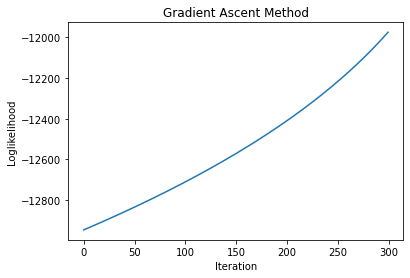

In [49]:
plt.plot(error_one)
plt.xlabel('Iteration')
plt.ylabel('Loglikelihood')
plt.title('Gradient Ascent Method')
plt.show()

#### 6.1.3 Gradient Ascent With Mini-Batch  Size

In [50]:
def mini_batch_ga_lr(x,y,beta,batch_size,mu, i_max):
    dim_one = int(x.shape[0])
    dim_two = int(x.shape[1])
    loss =[]
    epoch_number = math.floor(dim_one/batch_size)
    for i in range(0,i_max):  
        for j in range(0,epoch_number-1):
            y_prediction = np.zeros((dim_one,1))
            for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
            value_one = (x[j*batch_size:(j+1)*batch_size]).T
            value_two = (y[j*batch_size:(j+1)*batch_size]-y_prediction[j*batch_size:(j+1)*batch_size])
            beta_new = beta + mu*value_one@value_two
            loss.append(loglikelihood(x,y,beta_new))
            beta =beta_new
               
        y_prediction = np.zeros((dim_one,1))
        for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
                
        beta_lost = beta + mu*x[(epoch_number)*batch_size:dim_one].T@(y[(epoch_number)*batch_size:dim_one]- y_prediction[(epoch_number)*batch_size:dim_one])
        loss.append(loglikelihood(x,y,beta_lost))
        beta = beta_lost
 
    return loss
    
    

In [51]:
errors_mini = mini_batch_ga_lr(x_train,y_train,b,500,0.000001,10)

Text(0, 0.5, 'Loglikelihood')

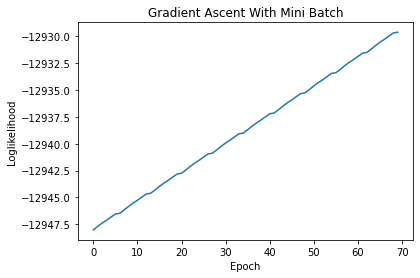

In [52]:
plt.plot(errors_mini)
plt.title('Gradient Ascent With Mini Batch')
plt.xlabel('Epoch')
plt.ylabel('Loglikelihood')

### 7. BACKWARD SELECTION WITH AIC

In this part, we would implement a backward selection procedure with regard to the AIC mtric. The AIC metric :

$\begin{equation} min AIC = - 2 log L + 2p  
\end{equation}$

where L is the loglikelihood. p is the number of parameters.

### 7.2 Backward Selection

In [53]:
x_train_backward = x_train
aic_initial = -2*mini_batch_ga_lr(x_train,y_train,np.ones((16,1)),500,0.000001,10)[-1]+2*16

In [54]:
for p in range(0,15):
    k=100
    a = 16-p
    b = np.ones((a-1,1))
    for i in range(0,a):
        L = -2*mini_batch_ga_lr(np.delete(x_train_backward,i,1),y_train,b,500,0.000001,10)[-1]+2*(a-1)
        if L<aic_initial:
            aic_initial = L
            k=i
    if k!=100:
        x_train_backward = np.delete(x_train_backward,k,1)
        print(i,'th iteration')
    else:
        break

15 th iteration
14 th iteration
13 th iteration
12 th iteration
11 th iteration
10 th iteration
9 th iteration
8 th iteration
7 th iteration
6 th iteration
5 th iteration
4 th iteration
3 th iteration
2 th iteration
1 th iteration


In [55]:
print(x_train_backward.shape)

(3616, 1)


### 7.3 Logloss Backward Selection: After vs. Before

In [56]:
error_back =mini_batch_ga_lr(x_train_backward,y_train,b,500,0.000001,10)

Text(0, 0.5, 'Logloss')

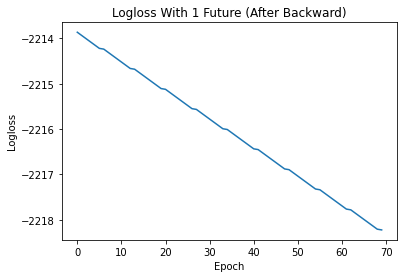

In [57]:
plt.plot(error_back)
plt.title('Logloss With 1 Future (After Backward)')
plt.xlabel('Epoch')
plt.ylabel('Logloss')

In [58]:
logloss_before_backward =mini_batch_ga_lr(x_train,y_train,np.ones((16,1)),500,0.000001,10)

Text(0, 0.5, 'Logloss')

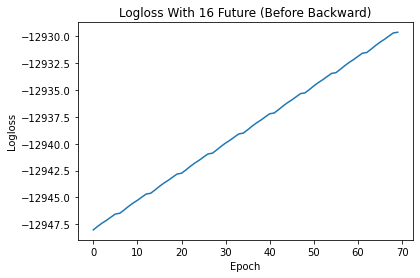

In [59]:
plt.plot(logloss_before_backward)
plt.title('Logloss With 16 Future (Before Backward)')
plt.xlabel('Epoch')
plt.ylabel('Logloss')

After, I applied backward variable selection, until just one feature left, logloss increased. For this reason, even logloss algorithm is not increasing while I am using ine feature, logliss is the minimum.

### 7.4 Final Error

In [60]:
def mini_batch_final_error(x,y,beta,batch_size,mu, i_max):
    dim_one = int(x.shape[0])
    dim_two = int(x.shape[1])
    epoch_number = math.floor(dim_one/batch_size)
    for i in range(0,i_max):  
        for j in range(0,epoch_number-1):
            y_prediction = np.zeros((dim_one,1))
            for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
            value_one = (x[j*batch_size:(j+1)*batch_size]).T
            value_two = (y[j*batch_size:(j+1)*batch_size]-y_prediction[j*batch_size:(j+1)*batch_size])
            beta_new = beta + mu*value_one@value_two
            beta =beta_new
               
        y_prediction = np.zeros((dim_one,1))
        for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
                
        beta_lost = beta + mu*x[(epoch_number)*batch_size:dim_one].T@(y[(epoch_number)*batch_size:dim_one]- y_prediction[(epoch_number)*batch_size:dim_one])
       
        beta = beta_lost

            
    for m in range(0,y.shape[0]):
        if y_prediction[m]> 0.5:
            y_prediction[m]=1
        else:
            y_prediction[m]=0
 
    return y_prediction

#### Final Error Before Backward

In this part we would calculate the classification accuracy rate for before and after backwards value selection

In [61]:
final_error_before_backward=mini_batch_final_error(x_train,y_train,np.ones((16,1)),500,0.000001,10)

In [62]:
final_error_before_backward

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

Now, we should translate y_train into non normalized values. As you remember, we normalized data and so y train set to. Here -0.131 is the normalized value of 0. So to calculate classification accuracy we will change the y train data to nonrmalized vektor y_ones_zero.

In [63]:
range_one = int(y_train.shape[0])

y_ones_zero =np.zeros((range_one,1))
#-0.13160102 is 0 
for i in range(1,range_one):
    number =float(y_train[i])
    if number <-0.131:
        y_ones_zero[i] = 0
    else:
        y_ones_zero[i] =1
    

    

In [64]:
y_ones_zero

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [65]:
print('Classification Accuracy Value Before Backward:\n',float(sum(abs(final_error_before_backward -y_ones_zero)/range_one)))

Classification Accuracy Value Before Backward:
 0.70298672566369


#### Final Error After Backward

In [66]:
 final_error_after_backward=mini_batch_final_error(x_train_backward,y_train,np.ones((1,1)),500,0.000001,10)

In [67]:
print('Classification Accuracy Value :\n',float(sum(abs(y_ones_zero-final_error_after_backward)))/range_one)

Classification Accuracy Value :
 0.8808075221238938


In [68]:
y_ones_zero

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# EXERCISE 2

# REGULARIZATION for LOGISTIC REGRESSION

## 1. L2 REGULARIZED LR

First, we should define new loglikelihood function for regularized logistic regression.

In [69]:
def loglikelihood_regularized(x,y,beta,lamba):
    dim_one= int(x.shape[0])
    dim_two= int(x.shape[1])
    loss = 0
    reg_sum=0
    for i in range(0,dim_one):
        loss= float(loss + y[i]*((x[i].reshape((dim_two,1))).T@beta) - np.log(1  + (np.exp(x[i].reshape((dim_two,1))).T @beta)))
        
    for j in range(0,dim_two):
        reg_sum = reg_sum +beta[j]**2
        
    return float(loss-2*lamba*reg_sum)

## 2. CREATING A GRID

In this part, we would create values to apply grid search. For this reason, I would randomly choose 3 different step size values and 3 different ragularization parameters. In total, I would have 9 different combinations for grid search.

In [70]:
np.random.seed(3116)

step_length_list = np.random.uniform(0.000001, 0.0001, 3)
lambda_list = np.random.uniform(0.00001, 0.01, 3)

grid = []
for i in step_length_list:
    for j in lambda_list:
        grid.append((i,j))

In [71]:
grid_table =pd.DataFrame(grid)
grid_table =grid_table.rename(columns = {0:'$a_0$',1:'lamdba'})
grid_table

,$a_0$,lamdba
0,0.000095,0.001730
1,0.000095,0.003910
2,0.000095,0.009453
3,0.000029,0.001730
4,0.000029,0.003910
5,0.000029,0.009453
6,0.000015,0.001730
7,0.000015,0.003910
8,0.000015,0.009453


### 3. CREATING 5-FOLD CROSS

Now, I will create a function which splits data into k folds.

In [72]:
def k_fold_cross(data,k):
    folds=[]
    a =math.floor(data.shape[0]/k)
    for i in range(0,k-1):
        folds.append(data[a*i:a*(i+1),:])
    folds.append(data[a*(k-1):,:])
        
    return folds
    

#### Example: k=5 data =bank set

In [73]:
fold_one = k_fold_cross(bank_set_matrix,5)[0]
print(fold_one.shape)

(904, 17)


In [74]:
fold_two = k_fold_cross(bank_set_matrix,5)[1]
print(fold_two.shape)

(904, 17)


In [75]:
fold_three = k_fold_cross(bank_set_matrix,5)[2]
print(fold_three.shape)

(904, 17)


In [76]:
fold_four = k_fold_cross(bank_set_matrix,5)[3]
print(fold_four.shape)

(904, 17)


In [77]:
fold_five = k_fold_cross(bank_set_matrix,5)[4]
print(fold_five.shape)

(905, 17)


### 4. SCORING ALL COMBINATIONS

We already update loglikelihood with regularization, Now, we have to update mini batch gradient descent.

### 4.1 Accuracy Value

In [80]:
def accuracy_value(y,y_predict):
    y_new = np.zeros((y.shape[0],1))
    y_predict_new = np.zeros((y.shape[0],1))
    for i in range(0,y.shape[0]):
        if y[i]<-0.131:
            y_new[i] = 0
        else:
            y_new[i] =1
    
    for j in range(0,y_predict.shape[0]):
        if y_predict[j]<0.5:
            y_predict_new[j]=0
        else:
            y_predict_new[j]=1
    
    value_one =sum(abs(y_new-y_predict_new))
    
    return float(value_one/y.shape[0])
    
    
    
    

### 4.2 Mini Batch Gradient Descent with Regularization

In [81]:
def mini_batch_regularized(x,y,beta,batch_size,mu, i_max,lamba):
    dim_one = int(x.shape[0])
    dim_two = int(x.shape[1])
    loss =[]
    accuracy_value_list = []
    epoch_number = math.floor(dim_one/batch_size)
    for i in range(0,i_max):  
        for j in range(0,epoch_number-1):
            y_prediction = np.zeros((dim_one,1))
            for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
            value_one = (x[j*batch_size:(j+1)*batch_size]).T
            value_two = (y[j*batch_size:(j+1)*batch_size]-y_prediction[j*batch_size:(j+1)*batch_size])
            beta_new = (1-2*lamba)*beta + mu*value_one@value_two
            loss.append(loglikelihood(x,y,beta_new))
            accuracy_value_list.append(accuracy_value(y,y_prediction))
            beta =beta_new
           
        y_prediction = np.zeros((dim_one,1))
        for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
                
        beta_lost = beta + mu*x[(epoch_number)*batch_size:dim_one].T@(y[(epoch_number)*batch_size:dim_one]- y_prediction[(epoch_number)*batch_size:dim_one])
        loss.append(loglikelihood_regularized(x,y,beta_lost,lamba))
        beta = beta_lost
 
    return loss,accuracy_value_list

In [82]:
loss_regularized =mini_batch_regularized(x_train,y_train,np.ones((16,1)),500,0.000001,10,0.003)

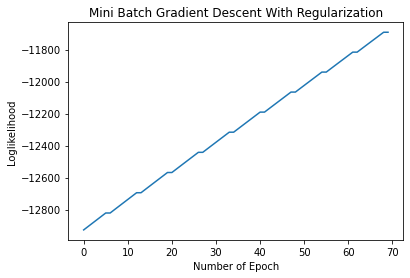

In [83]:
plt.plot(loss_regularized[0])
plt.title('Mini Batch Gradient Descent With Regularization')
plt.xlabel('Number of Epoch')
plt.ylabel('Loglikelihood')
plt.show()

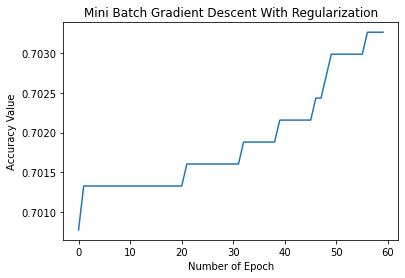

In [84]:
plt.plot(loss_regularized[1])
plt.title('Mini Batch Gradient Descent With Regularization')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy Value')
plt.show()

In [85]:
accuracy_value(y_train,np.ones((16,1)))

0.1230641592920354

### 4.3 COMBINING CROSS VALIDATION AND MINI BATCH

We have 5 folds and 9 different parameter combinations. 

In [86]:
grid_table

,$a_0$,lamdba
0,0.000095,0.001730
1,0.000095,0.003910
2,0.000095,0.009453
3,0.000029,0.001730
4,0.000029,0.003910
5,0.000029,0.009453
6,0.000015,0.001730
7,0.000015,0.003910
8,0.000015,0.009453


Now, we will creat algorithm to find best hyperparameters.

In [87]:
#situation 1: first set is test set
x_test_fold_one=fold_one[:,:-1] 
y_test_fold_one=fold_one[:,16:17]
x_train_fold_one=(np.concatenate((fold_two,fold_three,fold_four,fold_five),axis=0))[:,:-1]
y_train_fold_one=(np.concatenate((fold_two,fold_three,fold_four,fold_five),axis=0))[:,16:17]

#situation 2 : second fold is test set
x_test_fold_two = fold_two[:,:-1] 
y_test_fold_two=fold_two[:,16:17]
x_train_fold_two = (np.concatenate((fold_one,fold_three,fold_four,fold_five),axis=0))[:,:-1] 
y_train_fold_two = (np.concatenate((fold_one,fold_three,fold_four,fold_five),axis=0))[:,16:17]

#situation 3 : third fold is test set
x_test_fold_three = fold_three[:,:-1]
y_test_fold_three = fold_three[:,16:17]
x_train_fold_three= (np.concatenate((fold_one,fold_two,fold_four,fold_five),axis=0))[:,:-1]
y_train_fold_three= (np.concatenate((fold_one,fold_two,fold_four,fold_five),axis=0))[:,16:17]

#situation 4 : fourth fold is test set
x_test_fold_four = fold_four[:,:-1]
y_test_fold_four = fold_four[:,16:17]
x_train_fold_four =(np.concatenate((fold_one,fold_two,fold_three,fold_five),axis=0))[:,:-1]
y_train_fold_four =(np.concatenate((fold_one,fold_two,fold_three,fold_five),axis=0))[:,16:17]

#situation 5 : fivth fold is test set
x_test_fold_five=fold_five[:,:-1]
y_test_fold_five=fold_five[:,16:17]
x_train_fold_five = (np.concatenate((fold_one,fold_two,fold_three,fold_four),axis=0))[:,:-1]
y_train_fold_five = (np.concatenate((fold_one,fold_two,fold_three,fold_four),axis=0))[:,16:17]


In [92]:
def mini_batch_regularized_with_test(x,y,beta,batch_size,mu, i_max,lamba,x_test,y_test):
    dim_one = int(x.shape[0])
    dim_two = int(x.shape[1])
    loss =[]
    accuracy_value_list = []
    epoch_number = math.floor(dim_one/batch_size)
    for i in range(0,i_max):  
        for j in range(0,epoch_number-1):
            y_prediction = np.zeros((dim_one,1))
            for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
            value_one = (x[j*batch_size:(j+1)*batch_size]).T
            value_two = (y[j*batch_size:(j+1)*batch_size]-y_prediction[j*batch_size:(j+1)*batch_size])
            beta_new = (1-2*lamba)*beta + mu*value_one@value_two
            loss.append(loglikelihood(x_test,y_test,beta_new))
            accuracy_value_list.append(accuracy_value(y,y_prediction))
            beta =beta_new
           
        y_prediction = np.zeros((dim_one,1))
        for k in range(0,dim_one):
                y_prediction[k]=logistic_function(x[k].reshape((dim_two,1)),beta)
                
        beta_lost = beta + mu*x[(epoch_number)*batch_size:dim_one].T@(y[(epoch_number)*batch_size:dim_one]- y_prediction[(epoch_number)*batch_size:dim_one])
        loss.append(loglikelihood_regularized(x_test,y_test,beta_lost,lamba))
        beta = beta_lost
 
    return loss,accuracy_value_list

In [94]:
for i in range(0,9): 
    mu,lamba = grid[i]
    all_list=[]
    beta = np.ones((16,1))
    #sitiuation 1
    loss_1,accv_1 =mini_batch_regularized_with_test(x_train_fold_one,y_train_fold_one,beta,50,mu,1,lamba,x_test_fold_one,y_test_fold_one)

    #sitiuation 2
    loss_2,accv_2 =mini_batch_regularized_with_test(x_train_fold_two,y_train_fold_two,beta,50,mu,1,lamba,x_test_fold_two,y_test_fold_two)

    #sitiuation 3
    loss_3,accv_3 =mini_batch_regularized_with_test(x_train_fold_three,y_train_fold_three,beta,50,mu,1,lamba,x_test_fold_three,y_test_fold_three)

    #sitiuation 4
    loss_4,accv_4 =mini_batch_regularized_with_test(x_train_fold_four,y_train_fold_four,beta,50,mu,1,lamba,x_test_fold_four,y_test_fold_four)

    #sitiuation 5
    loss_5,accv_5 =mini_batch_regularized_with_test(x_train_fold_five,y_train_fold_five,beta,50,mu,1,lamba,x_test_fold_five,y_test_fold_five)
    
    all_list.append((mu,lamba,(accv_1[-1]+accv_2[-1]+accv_3[-1]+accv_4[-1]+accv_5[-1]) /5))
    print(f'Mean Loss{i}th Combination',(loss_1[-1]+loss_2[-1]+loss_3[-1]+loss_4[-1]+loss_5[-1])/5)
    print(f'Mean Accuracy{i}th Combination',(accv_1[-1]+accv_2[-1]+accv_3[-1]+accv_4[-1]+accv_5[-1]) /5)

Mean Loss0th Combination -3017.177160974929
Mean Accuracy0th Combination 0.7351252749430541
Mean Loss1th Combination -2748.2930133482546
Mean Accuracy1th Combination 0.7403232889917573
Mean Loss2th Combination -2070.2955440419537
Mean Accuracy2th Combination 0.7717875396664229
Mean Loss3th Combination -3058.4049633456148
Mean Accuracy3th Combination 0.7121768272244392
Mean Loss4th Combination -2793.577306761058
Mean Accuracy4th Combination 0.712563934199613
Mean Loss5th Combination -2148.3168197053355
Mean Accuracy5th Combination 0.7233469010645404
Mean Loss6th Combination -3066.794923152883
Mean Accuracy6th Combination 0.7069788743421552
Mean Loss7th Combination -2802.5176003263527
Mean Accuracy7th Combination 0.7073659507341195
Mean Loss8th Combination -2161.648282670747
Mean Accuracy8th Combination 0.7126745077938251


According to our calculation, best hyperparameter is 3rd combination.

In [100]:
accuracy =[0.7351252749430541,0.7403232889917573,0.771787539666422,0.7121768272244392,0.712563934199613,0.7233469010645404,0.7069788743421552,0.7073659507341195,0.7126745077938251]
mu=[]
lamba = []
for i in grid:
    mu.append(i[0])
    lamba.append(i[1])

### 4.4 3D Plotting

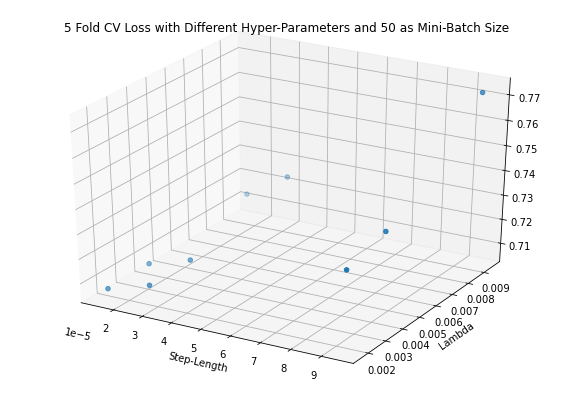

In [104]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu, lamba, accuracy,'ro',)
plt.title('5 Fold CV Loss with Different Hyper-Parameters and 50 as Mini-Batch Size')
plt.xlabel('Step-Length')
plt.ylabel('Lambda')
plt.show()

### 4.5 Best Hyperparameters

According to our algorithm, the best hyperparameters are 3th element of grid.

In [106]:
optimal_mu, optimal_lamba =grid[2]

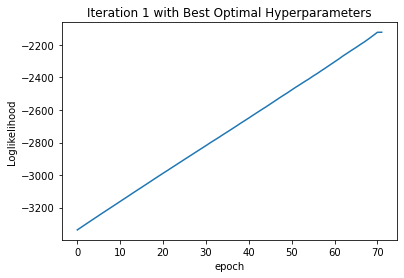

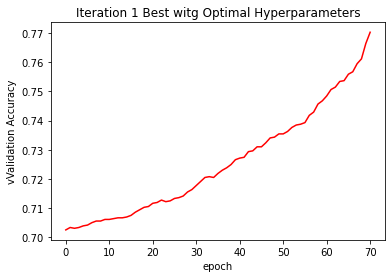

In [110]:
mu,lamba = grid[2]
all_list=[]
beta = np.ones((16,1))
    
#iteration 1
loss_1,accv_1 =mini_batch_regularized_with_test(x_train_fold_one,y_train_fold_one,beta,50,mu,1,lamba,x_test_fold_one,y_test_fold_one)

plt.title('Iteration 1 with Best Optimal Hyperparameters')
plt.plot(loss_1)
plt.xlabel('epoch')
plt.ylabel('Loglikelihood')
plt.show()



plt.title('Iteration 1 Best witg Optimal Hyperparameters')
plt.plot(accv_1,'r')
plt.xlabel('epoch')
plt.ylabel('vValidation Accuracy')
plt.show()



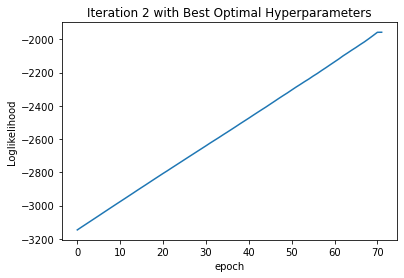

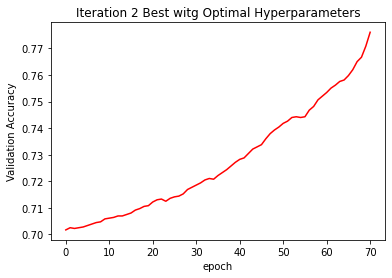

In [111]:
#iteration 2
loss_2,accv_2 =mini_batch_regularized_with_test(x_train_fold_two,y_train_fold_two,beta,50,mu,1,lamba,x_test_fold_two,y_test_fold_two)


plt.title('Iteration 2 with Best Optimal Hyperparameters')
plt.plot(loss_2)
plt.xlabel('epoch')
plt.ylabel('Loglikelihood')
plt.show()



plt.title('Iteration 2 Best witg Optimal Hyperparameters')
plt.plot(accv_2,'r')
plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')
plt.show()


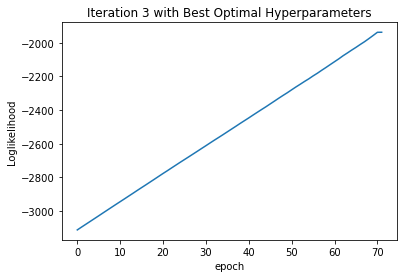

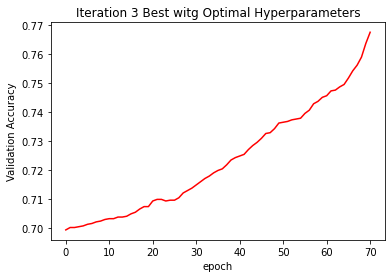

In [113]:
#iteration 3
loss_3,accv_3 =mini_batch_regularized_with_test(x_train_fold_three,y_train_fold_three,beta,50,mu,1,lamba,x_test_fold_three,y_test_fold_three)

plt.title('Iteration 3 with Best Optimal Hyperparameters')
plt.plot(loss_3)
plt.xlabel('epoch')
plt.ylabel('Loglikelihood')
plt.show()



plt.title('Iteration 3 Best witg Optimal Hyperparameters')
plt.plot(accv_3,'r')
plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')
plt.show()



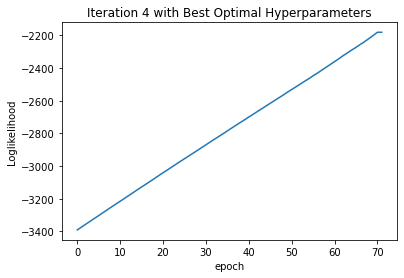

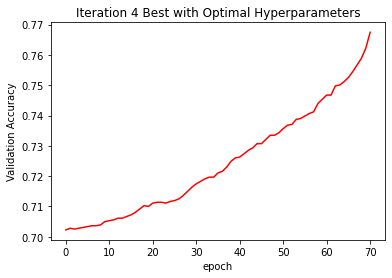

In [114]:
#iteration 4
loss_4,accv_4 =mini_batch_regularized_with_test(x_train_fold_four,y_train_fold_four,beta,50,mu,1,lamba,x_test_fold_four,y_test_fold_four)

plt.title('Iteration 4 with Best Optimal Hyperparameters')
plt.plot(loss_4)
plt.xlabel('epoch')
plt.ylabel('Loglikelihood')
plt.show()



plt.title('Iteration 4 Best with Optimal Hyperparameters')
plt.plot(accv_4,'r')
plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')
plt.show()




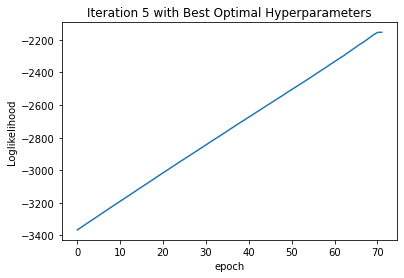

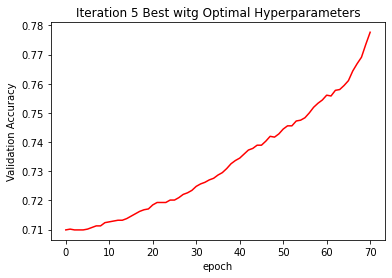

In [115]:
#iteration 5
loss_5,accv_5 =mini_batch_regularized_with_test(x_train_fold_five,y_train_fold_five,beta,50,mu,1,lamba,x_test_fold_five,y_test_fold_five)

plt.title('Iteration 5 with Best Optimal Hyperparameters')
plt.plot(loss_5)
plt.xlabel('epoch')
plt.ylabel('Loglikelihood')
plt.show()



plt.title('Iteration 5 Best witg Optimal Hyperparameters')
plt.plot(accv_5,'r')
plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')
plt.show()



# EXERCISE 3:

# HYPERBAND FOR LOGISTIC REGRESSION

Hyperband runs configs for just an iteration or two at first, to get a taste of how they perform. Then it takes the best performers and runs them longer.

It runs random configurations on a specific schedule of iterations per configuration using earlier results to select candidates for longer runs.

## 1.  TRAIN, TEST and VALIDATION DATA

In [43]:
bank_set_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.094373,-0.130360,-0.130360,-0.131601,-0.131601,2.085934,-0.131601,-0.131601,-0.131601,-0.108023,-0.120433,-0.033568,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
1,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,5.811194,-0.130360,-0.130360,-0.131601,-0.117951,-0.126637,0.141403,-0.130360,0.289073,-0.126637,-0.131601,-0.131601
2,-0.088169,-0.126637,-0.129119,-0.129119,-0.131601,1.543649,-0.130360,-0.131601,-0.131601,-0.111746,-0.127878,0.097970,-0.130360,0.277905,-0.130360,-0.131601,-0.131601
3,-0.094373,-0.126637,-0.130360,-0.129119,-0.131601,1.700006,-0.130360,-0.130360,-0.129119,-0.127878,-0.125396,0.115343,-0.126637,-0.132842,-0.131601,-0.127878,-0.131601
4,-0.058386,-0.130360,-0.130360,-0.130360,-0.131601,-0.131601,-0.130360,-0.131601,-0.129119,-0.125396,-0.126637,0.148848,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.090650,-0.121674,-0.130360,-0.130360,-0.131601,-0.544829,-0.130360,-0.131601,-0.131601,-0.094373,-0.124155,0.276664,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
4517,-0.060868,-0.124155,-0.130360,-0.129119,-0.130360,-4.242789,-0.130360,-0.130360,-0.129119,-0.120433,-0.126637,0.058261,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
4518,-0.060868,-0.119192,-0.130360,-0.130360,-0.131601,0.234472,-0.131601,-0.131601,-0.131601,-0.108023,-0.122915,0.055779,-0.117951,-0.132842,-0.131601,-0.127878,-0.131601
4519,-0.096855,-0.130360,-0.130360,-0.130360,-0.131601,1.279332,-0.131601,-0.131601,-0.131601,-0.124155,-0.130360,0.028478,-0.126637,0.130234,-0.127878,-0.130360,-0.131601


### 1. Shuffling The Data Samples

In [57]:
bank_set_shuffled = bank_set_normalized.sample(frac = 1)
bank_set_shuffled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3771,-0.055905,-0.126637,-0.130360,-0.129119,-0.131601,1.105602,-0.131601,-0.131601,-0.131601,-0.119192,-0.129119,-0.000063,-0.130360,-0.132842,-0.131601,-0.127878,-0.130360
2581,-0.094373,-0.126637,-0.129119,-0.129119,-0.131601,0.830117,-0.130360,-0.131601,-0.129119,-0.111746,-0.125396,0.022274,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
2463,-0.073277,-0.130360,-0.129119,-0.127878,-0.131601,2.899981,-0.131601,-0.131601,-0.129119,-0.109264,-0.125396,0.392070,-0.130360,-0.132842,-0.131601,-0.127878,-0.131601
1152,-0.069555,-0.131601,-0.130360,-0.130360,-0.131601,-0.131601,-0.131601,-0.131601,-0.131601,-0.126637,-0.122915,-0.024881,-0.126637,-0.132842,-0.131601,-0.127878,-0.131601
4265,-0.094373,-0.130360,-0.129119,-0.130360,-0.131601,1.199913,-0.130360,-0.131601,-0.131601,-0.125396,-0.126637,1.270645,-0.126637,-0.132842,-0.131601,-0.127878,-0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,-0.095614,-0.124155,-0.130360,-0.130360,-0.131601,-0.225911,-0.130360,-0.131601,-0.129119,-0.098096,-0.126637,0.246881,-0.129119,-0.132842,-0.131601,-0.127878,-0.131601
1513,-0.094373,-0.130360,-0.130360,-0.130360,-0.131601,-0.254453,-0.130360,-0.131601,-0.131601,-0.112987,-0.126637,0.047092,-0.125396,-0.132842,-0.131601,-0.127878,-0.131601
3299,-0.084446,-0.126637,-0.129119,-0.129119,-0.131601,0.398274,-0.130360,-0.131601,-0.131601,-0.124155,-0.126637,-0.110505,-0.127878,0.078115,-0.129119,-0.131601,-0.131601
828,-0.073277,-0.130360,-0.130360,-0.131601,-0.131601,0.076875,-0.130360,-0.131601,-0.130360,-0.094373,-0.131601,-0.049700,-0.130360,0.167462,-0.130360,-0.130360,-0.131601


### 2. Splitting the Data 

In [59]:
#train set %70
train_number_of_samples =math.floor(bank_set_shuffled.shape[0]*0.7)
train_set = bank_set_shuffled.iloc[:train_number_of_samples,:]

In [60]:
#validation set %15
validation_number_of_samples = math.floor(bank_set_shuffled.shape[0]*0.15)
validation_set = bank_set_shuffled.iloc[train_number_of_samples:train_number_of_samples+validation_number_of_samples ,:]


In [61]:
#test set %15
test_set = bank_set_shuffled.iloc[train_number_of_samples+validation_number_of_samples :,:]

### 3. Creating X and Y Matrix of Data Sets

In [62]:
#train set
train_set_x = np.array(train_set.iloc[ : , :-1])
train_set_y = np.array(train_set.iloc[:,-1]).reshape((3164,1))

In [63]:
#validation set
validation_set_x =np.array(validation_set.iloc[:,:-1])
validation_set_y = np.array(validation_set.iloc[:,15:16])

In [64]:
#test set
test_set_x = np.array(test_set.iloc[:,:-1])
test_set_y = np.array(test_set.iloc[:,15:16])

## 2. HYPERBAND

### 2.1 Introduction

Hyperband is principled early stopping method that adaptively allocates a predefined resource (iterations , data samples or number of features) to randomly sampled configurations. 

The quality of a predictive model critically depends on ots hyperparameter configuration, but it is poorly understood how these hyperparameters interact with each other to effect quality of the resulting model. Consequently, practioners often default either hand-tuning or automated brute-force methods like random search and grid search.

In an effort to develop more efficient search methods, the problem of hyperparameter optimization has recently been dominated by Bayesian optimization methods. thatt focus on optimizing hyperparameter configuratuon selection. These methods aim to identify good configurations more quickly than standard baselines like random search by selecting configurations in an adaptive manner.

Existing emprical evidence suggests that these methods outperform random search. However, these methods tackle a fundemantally challenging problem of simultaneously  fitting and ptimizing a high dimensional non convex function with unknow smoothness and possibly noisy evaluations. To overcome these difficulties some Bayesian optimization methods resort to heuristics at the expense of consistency guarantees. 

An orthogonal approach to hyperparameter optimization focuses on speeding up configuration evaluation. These methods are adaptive in computation, allocationg more resources to pormisin hyperparameter configurations while quickly eliminatiing poor ones. Resources can take various forms, including size of training set, number of features, or number of iterations for iterative algorithms.

### 2.2 Hyperband Algorithm

Hyperband extends the SuccesiveHalving algortihm proposed for hyperparameter optimization.

The idea behind SuccesiveHalving :uniformly allocate a budget to a set of hyperparameter configurations, evaluate the performance of all configurations, throw out the worst haly and repeat until one conigurations remains.

The algorithm allocates axponentially more resources to more promising configurations.

Unfortunately, SuccessiveHalving requires number of configurations n as an input the algortihm. Given some fnite budget B (an hour of training time to choose hyperparameter configuration), $B/n$ resources are allocated on average across the configurations.

However, for fixed B ,it is not clear a priori whether we should a consider many configurations (large n) with a small average training time, or b consider a small number of configurations (small n) with longer average training times.

### 2.3 Hyperband

Hyperband addresses this $n$ versus $B/n$ problem by considering several possible values of n for a fixed B, in essence performing a grid search over feasible value of n.

Associated with each value of n is a minimum resource r that is allocated to all configurations before some are discarded, a larger value of n corresponds to a smaller r and hence more aggressive early stopping. There are 2 components to Hyperband

1) inner loop invokes SuccesiveHalving for fixed values of n and r

2)The outer loop which iteraes over different values $n$ and $r$


It refers to each such run of SuccessiveHalving within hyperband as a bracket.

Each bracket is designed to use about B total resources and corresponds to a a different trade off between n and $B/n$

A single execution of Hyperban takes a finite number of iterations and in practice ca be repeated indefinitely. 